<a href="https://colab.research.google.com/github/Luantrannew/uni_project/blob/main/k_mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = np.array([[1, 2], [5, 8], [1.5, 1.8], [8, 8], [1, 0.6], [9, 11], [2, 3], [3, 4], [4, 5], [4.5, 6], [6, 7], [7, 7], [3, 6], [3, 8],[8,2],[7,4]])

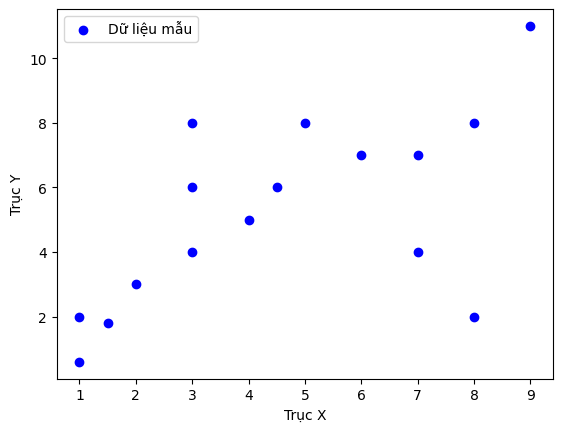

In [ ]:
figsize = (2,2)
x = data[:, 0]
y = data[:, 1]
plt.scatter(x, y, c='b', label='Dữ liệu mẫu')
plt.xlabel('Trục X')
plt.ylabel('Trục Y')
plt.legend()
plt.show()

In [ ]:
class KmeanClustering :

    def __init__(self,k=3):
        self.k = k
        self.centroids = None

    @staticmethod
    def euclidean_distance(data_point, centroids):
        return np.sqrt(np.sum((centroids - data_point)**2, axis=1))


    def fit(self,X,max_interations = 100) :
        # dùng numpy để tạo ra các random centroid
        self.centroids = np.random.uniform(np.amin(X,axis = 0),np.amax(X,axis = 0),size= (self.k , X.shape[1]))

        for _ in range (max_interations) :
            y =[] #cluster labels

            for data_point in X:
                distances = KmeanClustering.euclidean_distance(data_point, self.centroids) # câu lệnh này return một list distance của data_point tới từng centroid
                cluster_num = np.argmin(distances)
                y.append(cluster_num)

            y = np.array(y)

            # bước di chuyển centroid

            cluster_indices = [] # một list các list
            # cluster có index 0 sẽ có các datapoint có index 0

            for i in range (self.k):
                cluster_indices.append(np.argwhere(y == i))

            cluster_centers = []

            for i, indices in enumerate(cluster_indices) :
                if len(indices) == 0 : #những centroid không được gán bất kì datapoint nào
                    cluster_centers.append(self.centroids[i])
                else:
                    cluster_centers.append(np.mean(X[indices],axis=0)[0])

            if np.max(self.centroids - np.array(cluster_centers)) < 0.01:
                break
            else:
                self.centroids = np.array(cluster_centers)
        return y


In [ ]:
kmeans = KmeanClustering (k = 2)
Math_kmeans_label = kmeans.fit(data)

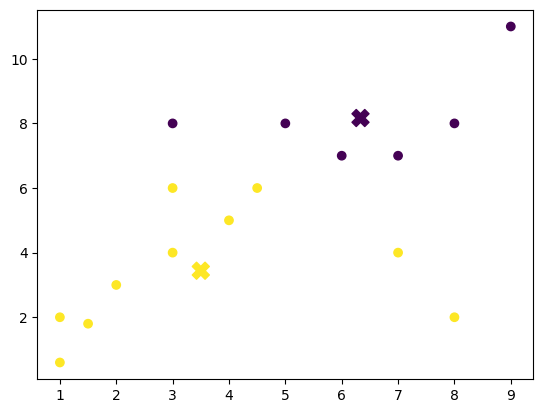

In [ ]:
figsize = (2,2)
plt.scatter(data[:, 0],data[:, 1], c= Math_kmeans_label)
plt.scatter(kmeans.centroids[:, 0],kmeans.centroids[:, 1], c = range(len(kmeans.centroids)), marker = 'X', s = 150)
plt1 = plt.gcf()
plt1.show()

##Dùng SKLearn


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
centers = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


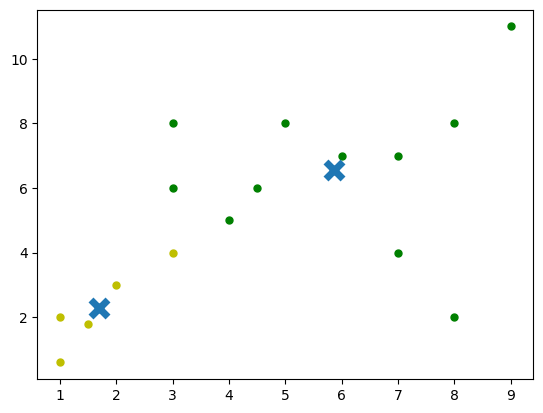

In [ ]:
# Lấy nhãn cụm cho từng điểm dữ liệu
labels = kmeans.labels_
# Hiển thị kết quả
colors = ["g.", "y."]

for i in range(len(data)):
    plt.plot(data[i][0], data[i][1], colors[labels[i]], markersize=10)

plt.scatter(centers[:, 0], centers[:, 1], marker="x", s=150, linewidths=5, zorder=10)
plt2 = plt.gcf()
plt2.show()

##sau khi áp dụng SSE

In [ ]:
class KmeanClustering:

    def __init__(self, k=3, n_init=20):
        self.k = k
        self.n_init = n_init  # Số lần chạy thuật toán với các khởi tạo ban đầu khác nhau
        self.centroids = None

    @staticmethod
    def euclidean_distance(data_point, centroids):
        return np.sqrt(np.sum((centroids - data_point) ** 2, axis=1))

    def fit(self, X, max_interations=100):
        best_labels = None
        best_inertia = float('inf')

        for _ in range(self.n_init):
            # Dòng này tạo khởi tạo centroid ngẫu nhiên khác nhau mỗi lần chạy
            initial_centroids = np.random.uniform(np.amin(X, axis=0), np.amax(X, axis=0), size=(self.k, X.shape[1]))

            self.centroids = initial_centroids

            for _ in range(max_interations):
                y = []  # cluster labels

                for data_point in X:
                    distances = self.euclidean_distance(data_point, self.centroids)  # Tính khoảng cách đến các centroid
                    cluster_num = np.argmin(distances)
                    y.append(cluster_num)

                y = np.array(y)

                # Bước di chuyển centroid
                cluster_indices = []  # Một list các list

                for i in range(self.k):
                    cluster_indices.append(np.argwhere(y == i))

                cluster_centers = []

                for i, indices in enumerate(cluster_indices):
                    if len(indices) == 0:  # Những centroid không được gán bất kì datapoint nào
                        cluster_centers.append(self.centroids[i])
                    else:
                        cluster_centers.append(np.mean(X[indices], axis=0)[0])

                if np.max(self.centroids - np.array(cluster_centers)) < 0.01:
                    break
                else:
                    self.centroids = np.array(cluster_centers)

            # Tính SSE cho kết quả hiện tại
            labels = self.predict(X)
            inertia = np.sum((X - self.centroids[labels]) ** 2)

            # Lưu lại kết quả nếu có SSE tốt nhất
            if inertia < best_inertia:
                best_inertia = inertia
                best_labels = labels

        return best_labels

    def predict(self, X):
        distances = np.vstack([self.euclidean_distance(x, self.centroids) for x in X])
        return np.argmin(distances, axis=1)


In [ ]:
kmeans2 = KmeanClustering (k = 2)
Math_kmeans_label2 = kmeans2.fit(data)

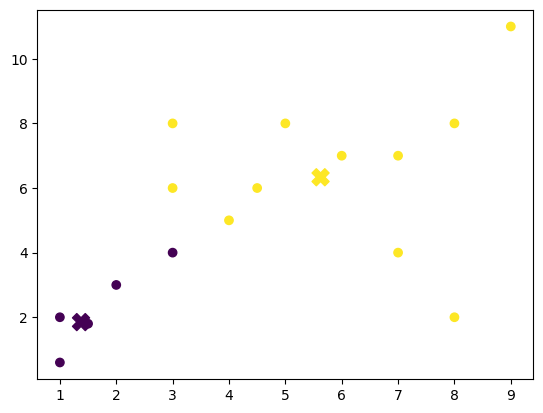

In [ ]:
figsize = (2,2)
plt.scatter(data[:, 0],data[:, 1], c= Math_kmeans_label2)
plt.scatter(kmeans2.centroids[:, 0],kmeans2.centroids[:, 1], c = range(len(kmeans.centroids)), marker = 'X', s = 150)
plt3 = plt.gcf()
plt3.show()

##So sánh


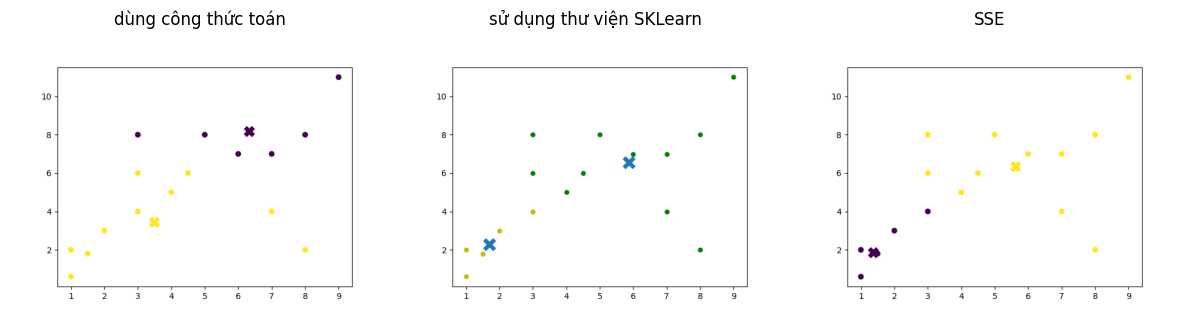

In [ ]:
# Lưu biểu đồ vào file hình ảnh
plt1.savefig('plt1.png')
plt2.savefig('plt2.png')
plt3.savefig('plt3.png')

# Hiển thị các hình ảnh
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(plt.imread('plt1.png'))
plt.title('dùng công thức toán')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(plt.imread('plt2.png'))
plt.title('sử dụng thư viện SKLearn')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(plt.imread('plt3.png'))
plt.title('SSE')
plt.axis('off')

plt.tight_layout()
plt.show()
